# 爬虫基础(二)

本课学习目标：

- 学会使用request发送post请求。
- 使用cookie来应对反爬虫等限制。
- 了解反爬虫的几种类型，以及如何反反爬虫

## 本课案例：

分析最近比较火的电视剧《长相思》里的扮演相柳的檀健次在社交媒体小红书中的热度。

通过在小红书检索“檀健次”这个关键字，统计检索出的top100个帖子的点赞、收藏、分享各自的总数。

爬虫目标：

1. 检索檀健次相关的笔记
2. 获取每篇笔记的点赞、收藏、分享数
3. 统计总数

## 动态获取数据

### get请求

http请求有两种最基本的请求方式:
- get: 获取数据，响应结果一般是静态的数据
- post: 发送数据，响应结果一般是动态的数据，根据请求的数据发生变化。

上节课我们简单学习了如何使用get请求获取网络数据。比如最简单的一个网络请求：

```python
import requests

url = "https://www.runoob.com/"

response = requests.get(url)

print(response.status_code)
print(response.text)

```

以及设置`headers`参数来发送请求。

### post请求

`requests` 库的 `post()` 函数用于发送HTTP POST请求。POST请求通常用于向服务器提交数据，例如提交表单数据、创建资源、上传文件等。以下是对 `requests.post()` 函数的详细解释和用法示例：

>`requests.post()` 函数的基本用法：

```python
import requests

response = requests.post(url, data=None, json=None, **kwargs)
```

- `url`（必需）：要请求的URL地址。
- `data`（可选）：要发送的数据，通常是一个字典、字符串或字节序列。用于提交表单数据或其他需要发送的数据。
- `json`（可选）：要发送的JSON数据，通常用于与RESTful API交互。
- `**kwargs`（可选）：其他可选参数，用于定制请求，如设置请求头、代理、身份验证等。

>返回值：

`requests.post()` 函数返回一个包含HTTP响应信息的`Response`对象，你可以通过该对象来查看和处理响应的各种属性和内容。

>常见的 `Response` 属性和方法：

- `response.status_code`：HTTP响应的状态码，例如200表示成功，404表示未找到，500表示服务器内部错误等。
- `response.headers`：响应头的字典，包含了HTTP头部信息。
- `response.text`：以字符串形式返回响应内容，通常用于处理文本响应。
- `response.content`：以字节形式返回响应内容，通常用于处理二进制响应（如图片、文件等）。
- `response.json()`：将响应内容解析为JSON格式。
- `response.raise_for_status()`：如果响应状态码表示失败（如4xx或5xx），则会引发异常。

> 示例：

```python
import requests

# 发送简单的POST请求
data = {"username": "user1", "password": "pass123"}
response = requests.post("https://example.com/login", data=data)
print("Status Code:", response.status_code)
print("Response Content:", response.text)

# 发送JSON数据的POST请求
json_data = {"name": "John", "age": 30}
response = requests.post("https://jsonplaceholder.typicode.com/posts", json=json_data)
print("Status Code:", response.status_code)
print("Response JSON:", response.json())

# 上传文件的POST请求
files = {'file': open('example.txt', 'rb')}
response = requests.post("https://example.com/upload", files=files)
print("Status Code:", response.status_code)
```

上述示例演示了如何使用 `requests.post()` 函数发送POST请求，提交数据、JSON数据和文件上传。你可以根据具体的需求和目标服务器的API文档来构造不同类型的POST请求。要确保处理响应时考虑到错误处理和异常处理，以保证代码的健壮性。


### get vs post

比如在豆瓣电影搜索霸王别姬，可以看到浏览器上的链接显示如下：
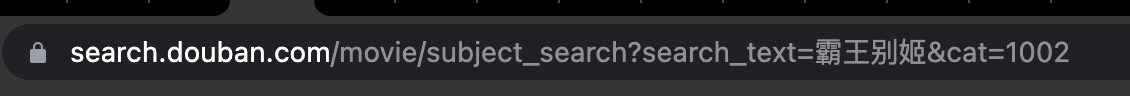

那么我们可以直接构造一个get请求如下：


In [20]:
import requests
from urllib.parse import quote



cookie = '''bid=R_5_4uINwpg; ll="108288"; _ga=GA1.1.503438265.1693912330; _ga_Y4GN1R87RG=GS1.1.1693912329.1.1.1693912427.0.0.0; __utmc=30149280; dbcl2="65813696:nnh2fznCBsw"; ck=2qGF; push_noty_num=0; push_doumail_num=0; frodotk_db="d5e9bc95f008b56481bd35c1d01a202c"; ap_v=0,6.0; __utma=30149280.503438265.1693912330.1694037079.1694038974.7; __utmz=30149280.1694038974.7.2.utmcsr=movie.douban.com|utmccn=(referral)|utmcmd=referral|utmcct=/subject/1292052/; __utmv=30149280.6581; amp_6e403e=bHnPVddE_7yjogiSt2fVCj...1h9m9enlf.1h9ma12en.0.0.0; __utmt=1; __utmb=30149280.12.10.1694038974'''
# 定义请求URL
url = "https://search.douban.com/movie/subject_search"
headers = {
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36",
    "cookie": cookie
}
# 构建请求参数
keyword = "钢铁侠"
encoded_keyword = quote(keyword, encoding="utf-8")

params = {
    "search_text": encoded_keyword,  # 搜索关键词
    "cat": "1002",   # 电影分类，1002表示剧情片
}

# 发送GET请求
response = requests.get(url, params=params, headers=headers)

# 检查请求是否成功
if response.status_code == 200:
    # 解析响应数据（这里假设返回的是JSON格式）
    data = response.json()
    
    # 处理返回的数据，例如打印电影信息
    for movie in data:
        print(f"电影名称：{movie['title']}")
        print(f"导演：{movie['directors']}")
        print(f"评分：{movie['rate']}")
        print("\n")
else:
    print(f"请求失败，HTTP状态码：{response.status_code}")


JSONDecodeError: Expecting value: line 2 column 1 (char 1)

In [21]:
import requests

# 定义请求URL
url = "https://movie.douban.com/movie/subject_search"

# 构建请求参数
payload = {
    "search_text": "钢铁侠",  # 搜索关键词
    "cat": "1002",   # 电影分类，1002表示剧情片
}

# 发送POST请求
response = requests.post(url, data=payload, headers=headers)

# 检查请求是否成功
if response.status_code == 200:
    # 解析响应数据（这里假设返回的是JSON格式）
    data = response.text
    
    print(data)
else:
    print(f"请求失败，HTTP状态码：{response.status_code}")


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

## 反爬虫技术

https://juejin.cn/post/7145268210126815239

### 什么是反爬虫相关技术
在了解具体的反爬虫措施之前，我们先介绍下反爬虫的定义和意义，限制爬虫程序访问服务器资源和获取数据的行为称为反爬虫。


### 为什么反爬虫

爬虫程序的访问速率和目的与正常用户的访问速率和目的是不同的，大部分爬虫会无节制地对目标应用进行爬取，这给目标应用的服务器带来巨大的压力。爬虫程序发出的网络请求被运营者称为“垃圾流量”。开发者为了保证服务器的正常运转或降低服务器的压力与运营成本，不得不使出各种各样的技术手段来限制爬虫对服务器资源的访问。
所以为什么要做反爬虫，答案是显然的，爬虫流量会提升服务器的负载，过大的爬虫流量会影响到服务的正常运转，从而造成收入损失，另一方面，一些核心数据的外泄，会使数据拥有者失去竞争力。


### 常见的反爬虫手段，

如下图所示。主要包含文本混淆、页面动态渲染、验证码校验、请求签名校验、大数据风控、js混淆和蜜罐等，其中文本混淆包含css偏移、图片伪装文本、自定义字体等，而风控策略的制定则往往是从参数校验、行为频率和模式异常等方面出发的。

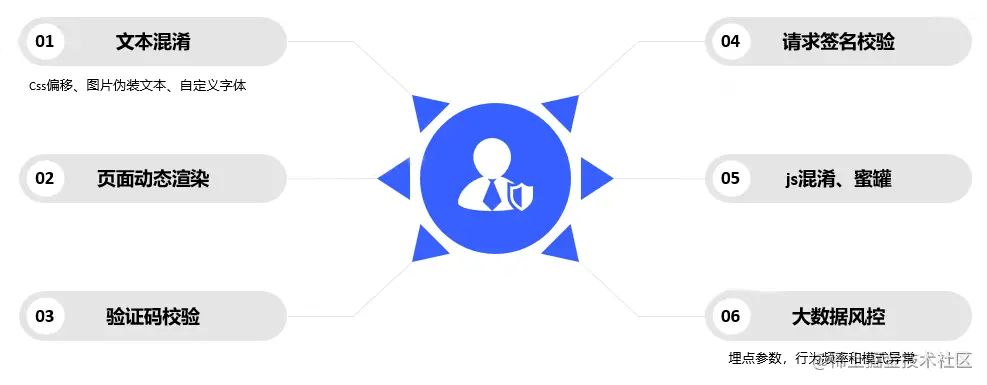

常见的反爬虫策略有很多种，网站采取这些策略的目的是为了保护自己的数据和资源，防止被恶意爬虫滥用。以下是一些常见的反爬虫策略：

1. **User-Agent检测：** 网站会检查HTTP请求头中的User-Agent字段，如果发现是非标准的或自动化爬虫的User-Agent，可能会限制或拒绝访问。
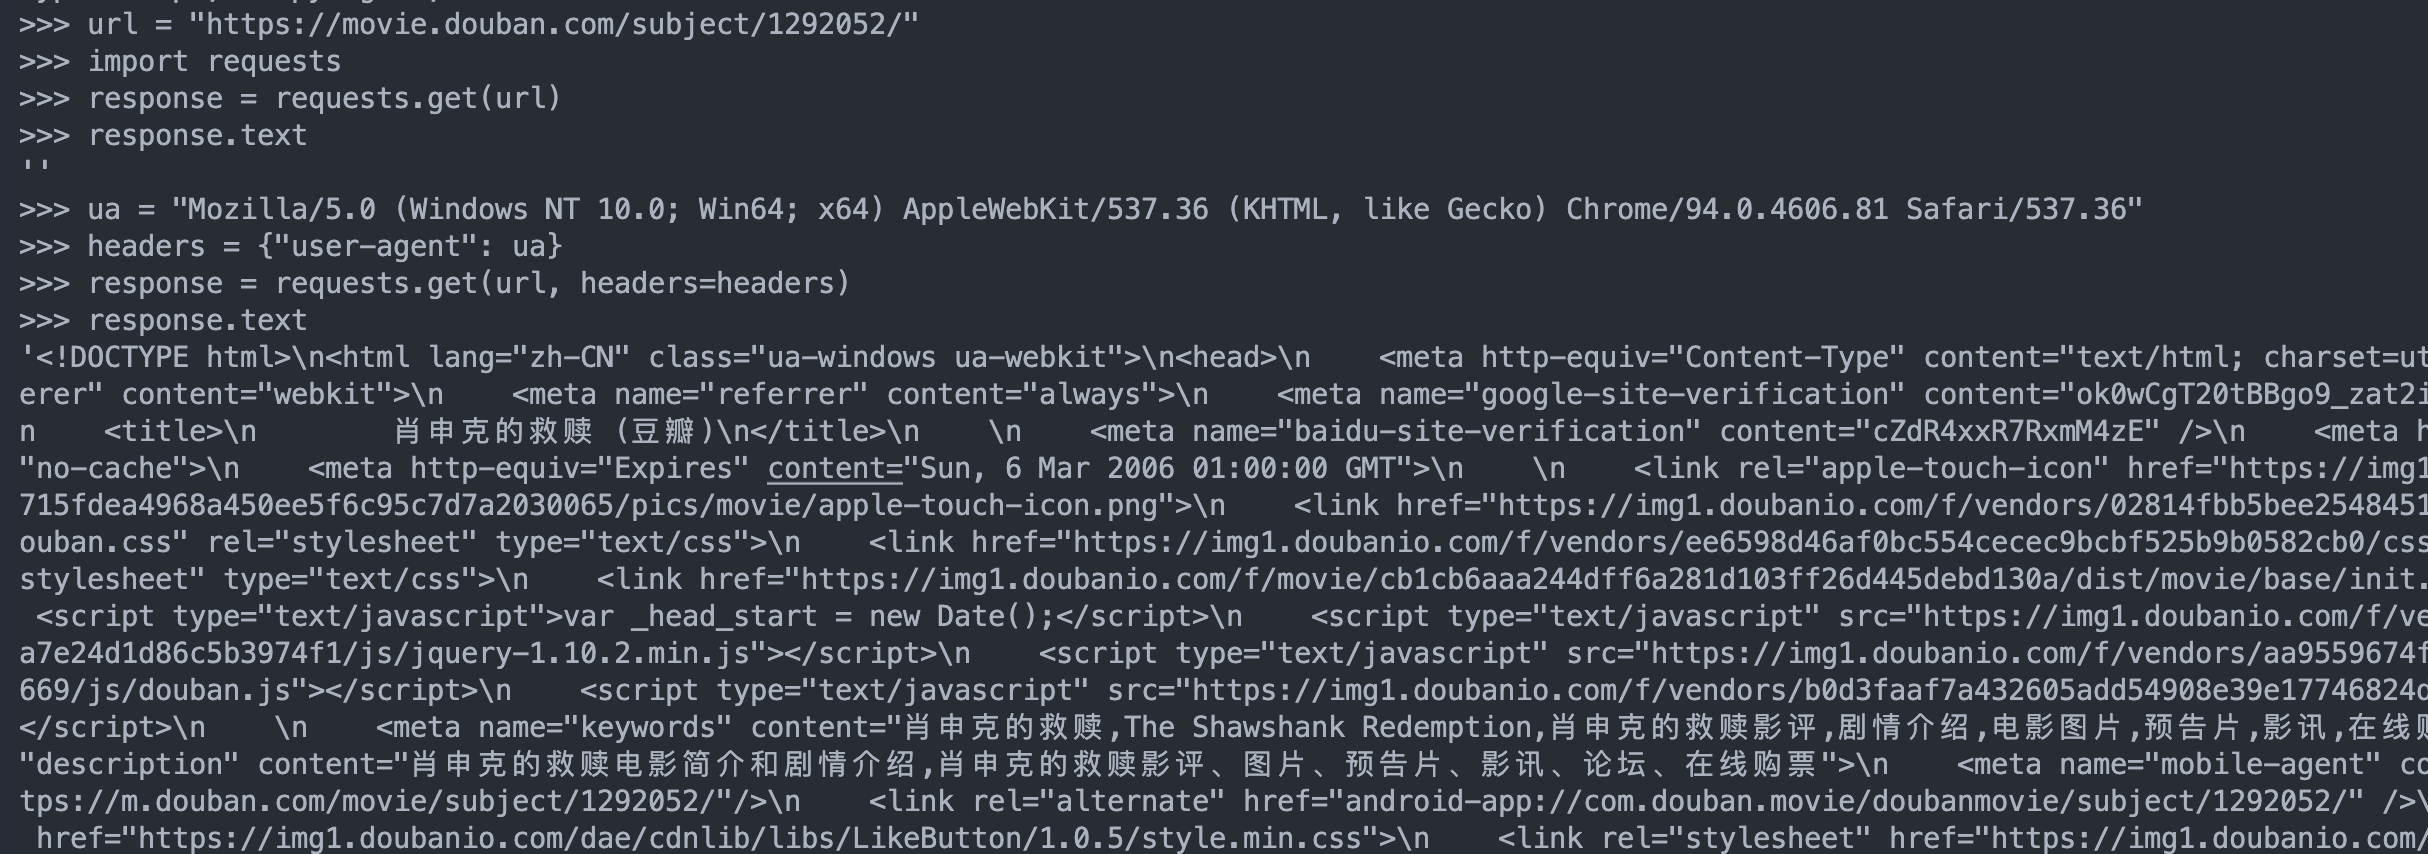
2. **IP封锁：** 网站可能会封锁频繁访问的IP地址，导致无法访问网站或数据。

3. **验证码：** 在访问敏感页面或频繁访问时，网站可能会弹出验证码，要求用户手动输入以确认身份。

4. **频率限制：** 网站可能会限制同一IP地址或用户在一段时间内的请求频率，以防止过于频繁的请求。

5. **Cookie识别：** 网站可以使用Cookie来跟踪用户会话，如果没有合适的Cookie，可能会限制对某些页面或功能的访问。

6. **内容隐藏：** 网站可以使用JavaScript等技术将内容动态加载，需要解析JavaScript才能获取数据。

7. **反爬虫中间件：** 有些网站使用反爬虫中间件，通过检测HTTP请求中的特定属性、行为或模式来标识和拦截爬虫。

8. **机器学习识别：** 一些网站采用机器学习算法来识别异常请求模式，例如异常的访问时间、请求参数、请求路径等。

9. **反爬虫代理池：** 网站可能会积极监测和封锁公共代理服务器的IP地址，以减少代理爬虫的访问。

10. **随机延迟：** 一些爬虫可能会在请求之间添加随机延迟，以模拟人类用户的操作行为。

11. **数据加密：** 网站可能会使用加密算法对数据进行加密，只有合法用户才能解密获取数据。

12. **监控和报警系统：** 网站可能会设置监控和报警系统，一旦检测到异常访问，会自动触发报警并采取相应措施。

13. **Honeypot陷阱：** 网站可能会设置虚假的链接或页面，以吸引爬虫，然后采取相应措施。

这些反爬虫策略可以单独或组合使用，取决于网站的需求和资源保护程度。爬虫开发者需要谨慎设计爬虫程序，以避免触发这些策略，同时遵守网站的使用政策和法律法规。

### 如何应对反爬虫

应对反爬虫策略需要具体情况具体分析，取决于网站采用的具体策略和您的爬虫需求。以下是一些应对反爬虫策略的通用方法和建议：

1. **模拟真实用户行为：** 使爬虫的行为模拟真实用户的操作，包括随机延迟请求、随机生成User-Agent等。这可以减少被检测为爬虫的概率。

2. **使用代理IP：** 使用代理IP来分散请求，避免频繁请求同一IP地址。注意要使用高质量的代理IP，以避免被封禁。

3. **处理验证码：** 如果网站弹出验证码，可以使用自动化工具处理验证码，但请确保处理方法合法。例如，使用第三方的验证码识别服务。

4. **使用Session和Cookie：** 在爬虫中保持Session状态和Cookie，以便模拟登录状态，但不要滥用Cookie。

5. **分布式爬虫：** 使用分布式爬虫架构，将请求分散到多个不同IP地址上，减少对单一IP的频繁请求。

6. **遵守Robots协议：** 查看网站的robots.txt文件，遵守其中的规则，不访问网站明确禁止爬取的页面。

7. **处理动态加载内容：** 如果网站使用JavaScript动态加载内容，可以使用无头浏览器如Selenium来模拟浏览器行为获取数据。

8. **监控网站变化：** 定期检查网站结构和反爬虫策略的变化，及时调整爬虫策略。

9. **请求头设置：** 根据需要，设置适当的请求头，包括合理的User-Agent和Accept-Language等。

10. **异常处理：** 编写健壮的异常处理代码，以处理被封禁或限制的情况。

11. **合法合规：** 遵守网站的使用政策和法律法规，不进行非法爬取或滥用数据。

12. **访问频率控制：** 避免过于频繁的请求，根据网站的要求控制请求频率，以降低被封禁的风险。

13. **IP池：** 使用IP代理池来动态切换IP地址，以降低IP封锁的影响。

14. **使用扩展库：** 可以使用专门用于反反爬虫的库，如Scrapy、Splash等。

请注意，每个网站的反爬虫策略都不同，因此需要根据具体情况来调整爬虫策略。同时，爬取网站数据需要遵守法律法规和网站的使用政策，以确保合法合规。如果网站的反爬虫策略较复杂，可能需要更高级的技术和策略来应对。

#### 随机生成User-Agent

随机生成User-Agent可以帮助模拟不同的浏览器和设备，从而减少被识别为爬虫的风险。以下是一种Python代码示例，用于生成随机的User-Agent：

```python
import random

user_agents = [
    # 常见的桌面浏览器User-Agent
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36",
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Firefox/92.0",
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Edge/94.0.992.47",
    # 常见的移动设备User-Agent
    "Mozilla/5.0 (iPhone; CPU iPhone OS 15_0 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.0 Mobile/15E148 Safari/604.1",
    "Mozilla/5.0 (Linux; Android 11; SM-G975F) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Mobile Safari/537.36",
    "Mozilla/5.0 (iPad; CPU OS 15_0 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.0 Mobile/15E148 Safari/604.1",
]

# 从上述User-Agent列表中随机选择一个User-Agent
random_user_agent = random.choice(user_agents)

print("随机生成的User-Agent:", random_user_agent)
```

这段代码定义了一个包含常见的桌面浏览器和移动设备User-Agent的列表，然后使用`random.choice`函数随机选择一个User-Agent。您可以将生成的User-Agent设置为HTTP请求头中的User-Agent字段，以模拟不同浏览器和设备的请求。不过请注意，使用随机生成的User-Agent并不一定能够完全绕过所有的反爬虫策略，因此在实际应用中需要根据具体情况进行调整和测试。

#### 随机延迟请求

随机延迟请求是一种常见的反爬虫策略，它可以模拟真实用户的行为，降低被检测为爬虫的概率。您可以使用Python的`time`模块来实现随机延迟请求。以下是一个示例代码，演示如何随机延迟请求：

```python
import random
import time

# 定义请求间隔的时间范围，单位为秒
min_delay = 1  # 最小延迟时间（秒）
max_delay = 5  # 最大延迟时间（秒）

# 生成随机延迟时间
delay = random.uniform(min_delay, max_delay)

# 执行请求前等待随机延迟时间
time.sleep(delay)

# 发送HTTP请求
# 这里可以添加您的爬虫代码

print(f"请求完成，随机延迟了 {delay:.2f} 秒")
```

上述代码中，我们首先定义了一个最小延迟时间和最大延迟时间的范围（以秒为单位），然后使用`random.uniform`函数生成在这个范围内的随机延迟时间。接下来，使用`time.sleep`函数来等待随机延迟时间，然后执行HTTP请求。最后，输出实际的延迟时间。

您可以根据需要将上述代码嵌入到您的爬虫程序中，在每次发送HTTP请求之前都加入这段代码，以实现随机延迟请求。这样，您的爬虫将会以不同的时间间隔发送请求，模拟了真实用户的访问行为。请注意，具体的延迟时间范围可以根据您的需求进行调整。
